<h1 style="text-align: center; color:#1C1678">Content Based Filtering of Emotions</h1>

## <font color='4F1787'> Description</font>

Content-based filtering of emotions is a personalized recommendation approach that leverages the emotional content of items to make recommendations to users. Unlike collaborative filtering, which relies on user-item interactions, content-based filtering focuses on the intrinsic features of items and users' emotional preferences. By analyzing the emotional tone, sentiment, and context of content, this method tailors recommendations to match users' emotional states and preferences. It involves techniques such as sentiment analysis, natural language processing, and emotional profiling to understand the emotional resonance of content. Content-based filtering of emotions aims to enhance user satisfaction and engagement by delivering emotionally relevant recommendations tailored to individual preferences.




## <font color ='4F1787'>Problem Statement </font>

Develop a content-based recommendation system that accurately identifies and filters content based on the emotional tone or sentiment expressed within the content. The system should analyze textual data (such as social media posts, articles, reviews, etc.) and categorize the content into predefined emotional categories (such as joy, sadness, anger, fear, surprise, etc.). The goal is to create a model that can be used to recommend content that matches a user's current emotional state or to filter out content with certain emotional tones for improved user experience

### <font color ='#4F1787'>Importing Libraries</font>

In [82]:
%matplotlib inline
import pandas as pd
import seaborn  as sns
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


Importing various libraries for data manipulation, visualization, deep learning, natural language processing, and random number generation

In [84]:
import warnings
warnings.filterwarnings('ignore')

Suppresses all warning messages

### <font color ='#4F1787'>Importing the Dataset</font> 

In [87]:
from datasets import load_dataset
dataset = load_dataset("emotion",trust_remote_code=True)

#### <font color ='navy'>Displaying the data sets

In [89]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

#### <font color ='navy'>Creating the variables of each dataset

In [91]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']

### <font color ='#4F1787'>Exploratory Data Analysis (EDA)</font> 

#### <font color ='navy'>Converting datasets to pandas DataFrames for easier EDA

In [94]:
train_df = pd.DataFrame(train)
val_df = pd.DataFrame(val)
test_df = pd.DataFrame(test)

#### <font color ='navy'>Basic Dataset Information

In [96]:
print("Train Dataset Shape:", train_df.shape)
print("Validation Dataset Shape:", val_df.shape)
print("Test Dataset Shape:", test_df.shape)

Train Dataset Shape: (16000, 2)
Validation Dataset Shape: (2000, 2)
Test Dataset Shape: (2000, 2)


In [97]:
print("Train Dataset Summary:\n", train_df.describe())

Train Dataset Summary:
               label
count  16000.000000
mean       1.565937
std        1.501430
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        5.000000


The train dataset has a mean label of approximately 1.57, indicating a distribution skewed towards lower values, with labels ranging from 0 to 5.

#### <font color ='navy'>Missing Values Check

In [100]:
print("Missing Values in Train Dataset:\n", train_df.isnull().sum())

Missing Values in Train Dataset:
 text     0
label    0
dtype: int64


There are no missing values in training dataset

#### <font color ='navy'>Emotion Distribution in Train Dataset

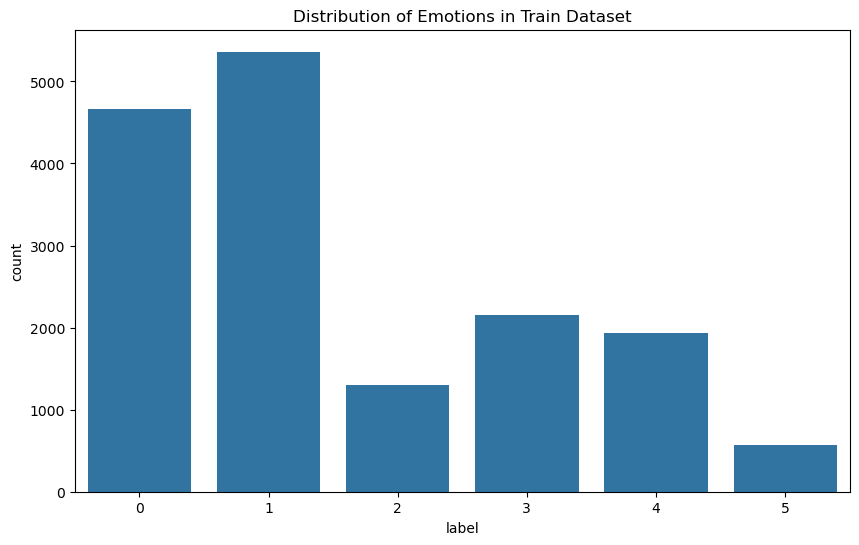

In [103]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=train_df)
plt.title('Distribution of Emotions in Train Dataset')
plt.show()

The plot reveals the representation of each emotion in the dataset

#### <font color ='navy'>Text Length Analysis in Train Dataset

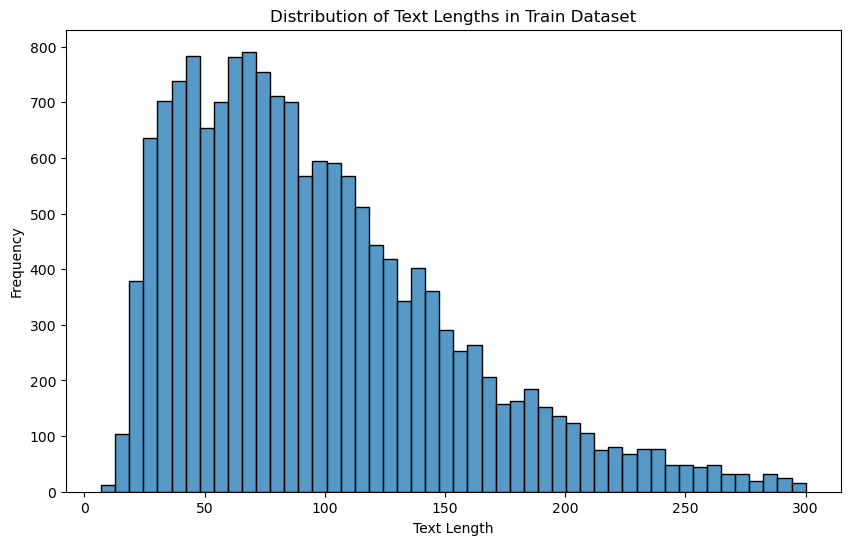

In [106]:
text_length = train_df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(text_length, bins=50 )
plt.title('Distribution of Text Lengths in Train Dataset')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

The distribution of text lengths in the train dataset shows that most texts are between 50 to 100 characters long, with a right-skewed distribution indicating fewer texts with lengths exceeding 150 characters.

### <font color ='#4F1787'>Data Preprocessing</font> 

#### <font color ='navy'>Creating a function named get_tweets and data is passed as a parameter

In [110]:
def get_tweets(data):

    #creating two empty lists i.e., tweets and labels
    tweets = [x['text'] for x in data]
    labels = [x['label'] for x in data]
    return tweets, labels

For each dictionary, we retrieve the value associated with the key 'text' and append it to tweets list. <br>
For each dictionary, we retrieve the value associated with the key 'label' and append it to label list.

#### <font color ='navy'>labeling the emotions by number in a dictionary format

In [113]:
label_to_emotion = {
    0: 'sadness',
    1: 'anger',
    2: 'love',
    3: 'surprise',
    4: 'fear',
    5: 'joy'
}

# Get the tweets and labels from train variable
tweets, labels = get_tweets(train)

# Print the set of integer labels
print(set(labels))

# Convert the integer labels to emotion names
emotions = [label_to_emotion[label] for label in labels]
# Print the set of emotion names
print(label_to_emotion)

{0, 1, 2, 3, 4, 5}
{0: 'sadness', 1: 'anger', 2: 'love', 3: 'surprise', 4: 'fear', 5: 'joy'}


#### <font color ='navy'>Displaying tweets

In [115]:
tweets[10], labels[10] 

('i feel like i have to make the suffering i m seeing mean something', 0)

### <font color ='#4F1787'>Tokenizing the Tweets</font> 

The Tokenizer class in the tensorflow.keras.preprocessing.text module is a powerful tool for tokenizing text data in Python. It provides methods to convert text into sequences of tokens, which can then be used for further analysis or modeling.

In [118]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [119]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')

tokenizer.fit_on_texts(tweets)

print(tokenizer.texts_to_sequences([tweets[10]]))

[[2, 3, 14, 2, 21, 5, 80, 6, 733, 2, 93, 544, 304, 84]]


Initializes a tokenizer with a limit of 10,000 words, fits it on a list of tweets, and converts the 11th tweet into a sequence of integers based on the fitted vocabulary.

### <font color ='#4F1787'>Padding and Truncating Sequences </font> 

By using the 'get_sequences' function to preprocess the tweet data, as it can convert the raw text data into a format that is suitable for input to a machine learning model.

In [123]:
# The pad_sequences function is part of the tensorflow.keras.preprocessing.sequence module.
# It takes a sequence of sequences as input and returns a new sequence of sequences with padded
# or truncated sequences to a specified length.

from tensorflow.keras.preprocessing.sequence import pad_sequences

Sequences: This is the input sequence of sequences that we want to pad or truncate.

#### <font color ='navy'>The tokenizer is an instance of a tokenizer object, and tweets is a list of strings representing the tweets.

In [126]:
def get_sequences(tokenizer, tweets):
    
    # Each tweet is transformed into a sequence of numbers based on the tokenizer's vocabulary.
    sequences = tokenizer.texts_to_sequences(tweets)

    # It takes the sequences as input and performs padding to make all sequences of equal length.
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=50, padding='post')
    return padded_sequences

The function get_sequences transforms tweets into padded sequences of numbers using a tokenizer, ensuring all sequences are of equal length.

In [128]:
padded_train_sequences = get_sequences(tokenizer, tweets)

In [129]:
padded_train_sequences[10]

array([  2,   3,  14,   2,  21,   5,  80,   6, 733,   2,  93, 544, 304,
        84,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

### <font color ='#4F1787'>Preparing the Emotion Labels</font> 

#### <font color ='navy'>Extracting Unique Classes from Labels.

In [132]:
classes = set(labels)
print(classes)

{0, 1, 2, 3, 4, 5}


#### <font color ='navy'> Mapping Class Labels to Indices and Vice Versa

In [134]:
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())

Creates two dictionaries: classes_to_index, which maps class labels to their corresponding indices, and index_to_classes, which maps indices back to the class labels. 

In [136]:
index_to_classes

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

#### <font color ='navy'> Mapping Class Labels to Numeric IDs

In [138]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

Converts a list of class labels into an array of corresponding indices using a dictionary classes_to_index.

#### <font color ='navy'> Convert Label Names to IDs

In [141]:
train_labels = names_to_ids(labels)
print(train_labels[11])

1


### <font color ='#4F1787'>Creating the RNN Model with LSTM</font> 

In [143]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16, input_length=50),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.build(input_shape=(None, 50))  # batch size None, sequence length 50

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 50, 16)              │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 50, 40)              │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 40)                  │           9,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             246 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 175,926 (687.21 KB)

 Trainable params: 175,926 (687.21 KB)

 Non-trainable params: 0 (0.00 B)

The model is a sequential neural network with embedding, bidirectional LSTM layers, and a dense output layer, designed for multi-class classification with categorical cross-entropy loss

### <font color ='#4F1787'>Training the Model</font> 

#### <font color ='navy'> Preparing Validation Data 

In [147]:
val_tweets, val_labels = get_tweets(val)
val_sequences = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [148]:
val_tweets[20], val_labels[20]

('i just know to begin with i am going to feel shy about it', 4)

#### <font color ='navy'>Model Training

In [150]:
h = model.fit(
    padded_train_sequences, train_labels,validation_data=(val_sequences, val_labels),epochs=15,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
)

Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.3526 - loss: 1.5588 - val_accuracy: 0.6320 - val_loss: 0.9151
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7183 - loss: 0.7320 - val_accuracy: 0.8135 - val_loss: 0.5936
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8682 - loss: 0.4061 - val_accuracy: 0.8655 - val_loss: 0.4388
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9250 - loss: 0.2438 - val_accuracy: 0.8825 - val_loss: 0.3845
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9460 - loss: 0.1798 - val_accuracy: 0.8885 - val_loss: 0.3602
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9566 - loss: 0.1341 - val_accuracy: 0.8945 - val_loss: 0.3728
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9637 - loss: 0.1159 - val_accuracy: 0.8930 - val_loss: 0.3686
Epoch 8/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9734 - loss: 0.0867 - 

The model is trained on padded training sequences with early stopping based on validation accuracy for a maximum of 15 epochs

### <font color ='#4F1787'>Evaluating the Model</font> 

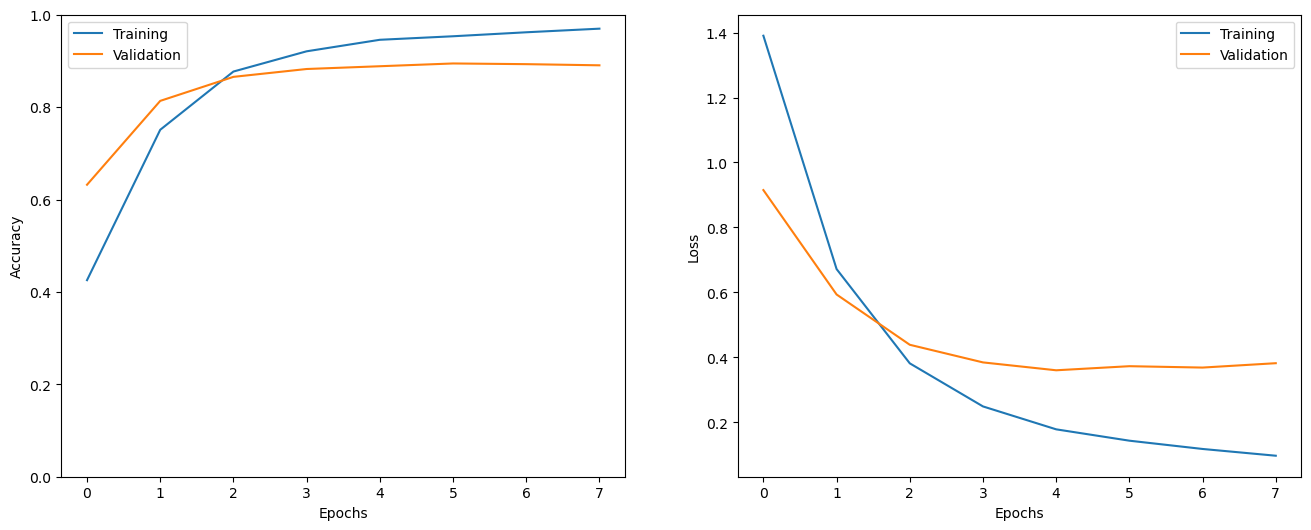

In [153]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

show_history(h)

### <font color ='#4F1787'>Testing Accuracy</font> 

#### <font color ='navy'>Preprocessing Test Tweets for Model Evaluation

In [156]:
test_tweets, test_labels = get_tweets(test)
test_sequences = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

The test tweets are tokenized and their corresponding labels are converted from names to IDs for further processing.

#### <font color ='navy'>Model Evaluation on Test Data

In [159]:
eval = model.evaluate(test_sequences, test_labels)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8777 - loss: 0.3991


The model achieved an accuracy of 88.27% with a loss of 0.4582.

In [161]:
preds = model.predict(test_sequences)
preds_classes = np.argmax(preds, axis=1)
print(preds_classes.shape, test_labels.shape)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
(2000,) (2000,)


### <font color ='#4F1787'>Text Content Prediction of Moods(Emotion)</font> 

In [163]:
for a in range(0, 5):
    i = random.randint(0, len(test_labels) - 1)

    print('Tweet:', test_tweets[i])
    print('Actual Emotion:', index_to_classes[test_labels[i]])
    l=index_to_classes[test_labels[i]]
    e=label_to_emotion[l]
    print(e)

    prediction = model.predict(np.expand_dims(test_sequences[i], axis=0))[0]
    predicted_class = np.argmax(prediction)

    print('Predicted Emotion:', index_to_classes.get(predicted_class))
    p=index_to_classes.get(predicted_class)
    pr=label_to_emotion[l]
    print(pr,'\n')

Tweet: i feel that an input from me will be valued as being less potent than say that of irfan pathan
Actual Emotion: 1
anger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Emotion: 1
anger 

Tweet: i usually end up sitting at my desk feeling like i m at work but just doing unimportant tasks or browsing the internet
Actual Emotion: 0
sadness
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Emotion: 0
sadness 

Tweet: i forced myself to keep going back even though they made me feel consistently uncomfortable but after a while i just gave up as i saw no point
Actual Emotion: 4
fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Emotion: 4
fear 

Tweet: i mentioned in my last blog that i have started to get the feeling that i have been pressured into studying things i do not like which has also made me into a person i might not fully be
Actual Emotion: 4
fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Emotion: 4
fear 

Tweet: i love the fact that i look as best i can and i feel terr

## <font color ='4F1787'>Conclusion</font>

By leveraging natural language processing and sentiment analysis techniques, this method tailors recommendations based on the emotional resonance of content with individual users. It enhances user experience by providing suggestions aligned with their emotional preferences and helps in discovering relevant content that resonates deeply. However, challenges such as accurately capturing and interpreting emotional nuances, as well as addressing privacy concerns related to emotional data, underscore the need for further research and ethical considerations in implementing content-based emotion filtering systems.